### (0 баллов) Считываем данные

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [4]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [5]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [7]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [8]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [97]:
linreg = LinearRegression()
linreg_prediction = linreg.fit(X_train, y_train).predict(X_test)

In [98]:
print(mean_squared_error(y_test, linreg_prediction))
print(linreg.coef_)

19.24922564051145
[-1.16571476e-01  5.45843668e-02  6.52967476e-02  2.93578349e+00
 -1.95745654e+01  3.44670935e+00  8.27723478e-03 -1.40766792e+00
  3.32808309e-01 -1.40840985e-02 -9.21696435e-01  8.71369432e-03
 -5.52694092e-01]


### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [99]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return  np.sum((y_real - y_pred) ** 2) / y_real.size

In [100]:
print(mean_squared_error(y_test, linreg_prediction) == MSE(y_test, linreg_prediction))

True


In [101]:
print(MSE(y_test, linreg_prediction))

19.24922564051145


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [102]:
naive_prediction = np.mean(y_test)

In [103]:
print(MSE(y_test, naive_prediction))

87.41096501345635


Модель линейной регрессии справляется явно лучше простого среднего

## Мои попытки улучшить качество модели через манипуляции с признаками

In [104]:
#Оценим качество через кросс-валидацию
print(-np.mean(cross_val_score(linreg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

25.316238346659752


In [105]:
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print(-np.mean(cross_val_score(linreg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

24.75128019417175


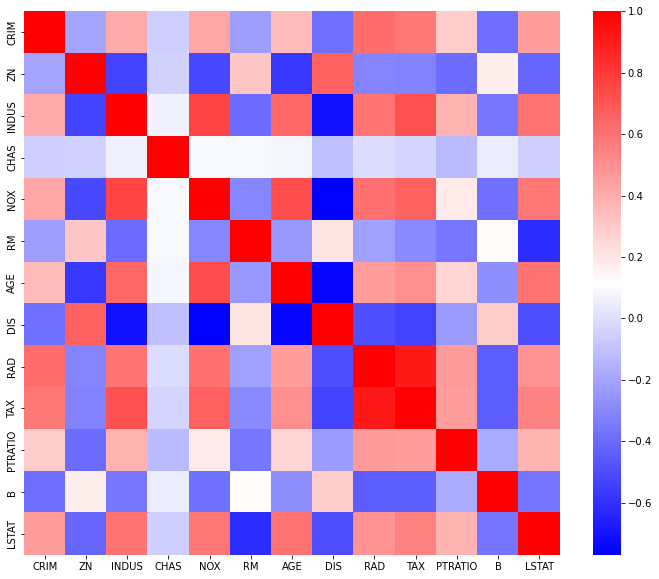

In [106]:
fig, ax = plt.subplots(figsize=(12, 10))
correlation = np.corrcoef(X, rowvar=False)
ax = sns.heatmap(correlation, cmap="bwr")
ax.set_xticklabels(dataset["feature_names"])
ax.set_yticklabels(dataset["feature_names"])
plt.show()

Видно, что признаки RAD и TAX сильно положительно скорредированны между собой, чего следует избегать при построении модели линейной регрессии. Попробуем выкинуть один из признаков

In [107]:
#Уберем RAD
X_scaled_RAD_deleted = np.delete(X_scaled, 8, 1)
X_train_RAD_deleted, X_test_RAD_deleted, y_train_RAD_deleted, y_test_RAD_deleted = train_test_split(X_scaled_RAD_deleted, y, test_size=0.1)
print(-np.mean(cross_val_score(linreg, X_train_RAD_deleted, y_train_RAD_deleted, cv=5, scoring="neg_mean_squared_error")))

23.713797126203957


In [108]:
#Уберем TAX
X_scaled_TAX_deleted = np.delete(X_scaled, 9, 1)
X_train_TAX_deleted, X_test_TAX_deleted, y_train_TAX_deleted, y_test_TAX_deleted = train_test_split(X_scaled_TAX_deleted, y, test_size=0.1)
print(-np.mean(cross_val_score(linreg, X_train_TAX_deleted, y_train_TAX_deleted, cv=5, scoring="neg_mean_squared_error")))

20.886095111964245


Ошибка маняется незначительно, поэтому в случае больших объемов данных и ограниченности ресурсов один из этих признаков можно убрать.

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [109]:
# Для L2
lambdas = np.arange(0.1, 20, 0.1)
mse = []
for lambda_ in lambdas:
    ridge = Ridge(alpha=lambda_)
    mse.append(-np.mean(cross_val_score(ridge, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

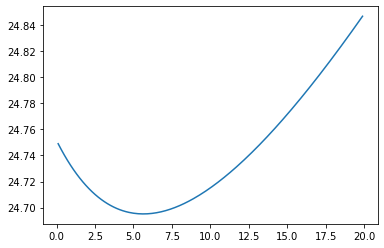

In [110]:
plt.plot(np.arange(0.1, 20, 0.1), mse)
plt.show()

In [111]:
print(np.min(np.array(mse)), np.arange(0.1, 40, 0.1)[np.argmin(np.array(mse))])

24.69519961782354 5.6


Ошибка минимальна при коэффициенте регуляризации 5.6, при этом ошибка меняется не сильно.

In [112]:
# Для L1
lambdas = np.arange(0.1, 3, 0.1)
mse = []
for lambda_ in lambdas:
    lasso = Lasso(alpha=lambda_)
    mse.append(-np.mean(cross_val_score(lasso, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

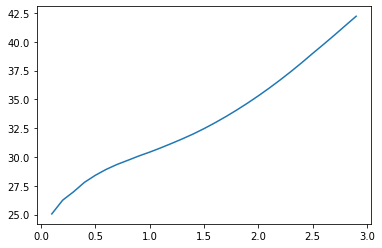

In [113]:
plt.plot(np.arange(0.1, 3, 0.1), mse)
plt.show()

In [79]:
print(np.min(np.array(mse)), np.arange(0, 3, 0.1)[np.argmin(np.array(mse))])

25.461008250078915 0.0


Ошибка минимальна при коэффициенте регуляризации 0, то есть при ее отсутствии.

In [117]:
# Сравним на тестовой выборке простую линейную регрессию и Ridge с оптимальным параметром
linreg = LinearRegression().fit(X_train, y_train)
linreg_prediction = linreg.predict(X_test)

ridge = Ridge(alpha=5.6).fit(X_train, y_train)
ridge_prediction = ridge.predict(X_test)
print(f"Ошибка обычной линейной регрессии: {MSE(linreg_prediction, y_test)}, ошибка Ridge: {MSE(ridge_prediction, y_test)}")

Ошибка обычной линейной регрессии: 19.624679395848286, ошибка Ridge: 19.077715451926718


Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация L2 действительно помогает MSE на тестовой выборке оказалась несколько ниже, однако этот эффект мал.
Регуляризация L1 наоборот ухудшает результат, вероятно переобучение на этом наборе данных практически не происходит.